# Project: Data Analysis of The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Movie Database (TMDb) data set contains information about roughly 10,000 movies, including user ratings and revenue. It was downloaded [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv), which represents cleaned data from original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

**Following research questions will be answered by this data analysis report:**
1. What are the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?
1. Are there any movies which are represented in more than one top 10 movies category previously explored?
1. What genres are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?
1. What directors are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?
1. What casts are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?
1. What production companies are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?
1. What are the worst 10 movies with lowest revenue adjusted, profit adjusted, voting average and popularity?
1. Are there any movies which are represented in more than one worst 10 movies category previously explored?
1. What genres are associated with the worst 10 movies with lowest revenue adjusted, profit adjusted, voting average and popularity?
1. How many movies per genre have been released?
1. How many movies have been released per year?
1. Movies released in which month generated the highest revenues and profit?

Let's import the packages required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Within this section, the structure and quality of the data will be assessed. Afterwards, the data will be cleaned and trimmed to make the data ready for exploration. Cleaning decisions will be documented and justified.
### General Properties

Load the data and show the first 5 rows.

In [2]:
df = pd.read_csv('data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Some general information about the data loaded:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Descriptive statistics of the dataset:

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The type for the first value, the count of unique values, the count of values that equal 0 and the count of missing values for each column is printed below.

In [5]:
print("{:<25} {:<25} {:<15} {:<20} {:<20}".format('Column', 'Type', 'Count unique', 'Count values == 0', 'Count NaN values'))
for c in df.columns:
    print("{:<25} {:<25} {:<15} {:<20} {:<20}".format(str(c), str(type(df[c][0])), df[c].nunique(), 
                                                      df[df[c]==0].shape[0], df[c].isna().sum()))

Column                    Type                      Count unique    Count values == 0    Count NaN values    
id                        <class 'numpy.int64'>     10865           0                    0                   
imdb_id                   <class 'str'>             10855           0                    10                  
popularity                <class 'numpy.float64'>   10814           0                    0                   
budget                    <class 'numpy.int64'>     557             5696                 0                   
revenue                   <class 'numpy.int64'>     4702            6016                 0                   
original_title            <class 'str'>             10571           0                    0                   
cast                      <class 'str'>             10719           0                    76                  
homepage                  <class 'str'>             2896            0                    7930                
director  

Bsaed on the information above, at a first glance it's visible that the dataset hass more than 10,000 rows and 21 columns and that some columns have missing values. The statistics and the number of unqiue values per column is conspicuous, because for columns `budget`, `revenue`, `budget_adj` and `revenue_adj` more than 50% and less than 75% of the numeric values seem to be 0. The proportion of unique counts from total counts is quite low. The count of 0 values for those numeric data types confirms that many values are missing. The feature names are good, contain no blanks and do not require any change. The datatypes for the features are well-chosen.Just for the feature `release_date`, the type should be change from `str` to `numpy.datetime64`. The following table provides a short description for each of the features. 

Features | Description
-- | --
id | a unique identification number for each movie
imdb_id | a unique identification string  for each movie in international movie database
popularity | a numeric metric, higher values represents a higher movie popularity
budget | the budget used to make the movie in US dollars
revenue | the revenue generated by the movie in US dollars
original_title | the original title of the movie
cast | the cast of the movie separated by \| characters
homepage |an url to the movie's homepage
director | the name of the director
tagline | the subtitle of the movie
keywords | keywords related to the movie separated by \| characters
overview | a short description of the movie
runtime | the duration of the movie in minutes
genres | the movie genres separated by \| characters
production_companies | the companies that produced the movie separated by \| characters
release_date | the release date of the movie
vote_count | the count of rating votes the movie has received
vote_average | the average rating the movie has received
release_year | the year in which the movie was released
budget_adj | the budget of the associated movie in terms of 2010 US dollars, accounting for inflation over time
revenue_adj | the revenue of the associated movie in terms of 2010 US dollars, accounting for inflation over time

### Data Cleaning
The features `'overview', 'tagline', 'homepage', 'keywords'` seem to be extraneous for this analysis, because no text analysis will be covered. For improved comparability of budgets and revenues the adjusted values will used. The columns `'overview', 'tagline', 'homepage', 'keywords', 'revenue', 'budget'` will be dropped.

In [6]:
df_v1 = df.drop(columns=['overview', 'tagline', 'homepage', 'keywords', 'revenue', 'budget'])
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

To strengthen the data quality and validity, duplicated data will be removed as follows. 

In [7]:
print("Number of duplicates: ", df_v1.duplicated().sum())
df_v1.drop_duplicates(inplace=True)
print("Number of duplicates after dropping duplicates: ", df_v1.duplicated().sum())

Number of duplicates:  1
Number of duplicates after dropping duplicates:  0


The count of rows with missing data is as follows. The data is missing in the following columns:

In [8]:
print("Count of rows: ", df_v1.isna().any(axis=1).sum())
print("Columns: ", df_v1.columns[df_v1.isna().any()].tolist())
print("{:<25} {:<20}".format('Column', 'Count NaN values'))
for c in df_v1.columns:
    count_na = df_v1[c].isna().sum()
    if count_na > 0:
        print("{:<25} {:<20}".format(str(c), count_na))

Count of rows:  1095
Columns:  ['imdb_id', 'cast', 'director', 'genres', 'production_companies']
Column                    Count NaN values    
imdb_id                   10                  
cast                      76                  
director                  44                  
genres                    23                  
production_companies      1030                


The existence of those missing values will be ignored. The missing value proportion is besides `production_companies` just a minor proportion of the data. Records with NaN values of the features `imdb_id`, `cast`, `director`, `genres` and `production_companies` should still be considered in explorations that are not related to those features. Especially, because we would loose 10% of records by dropping NaN values for `production_companies`.

In [9]:
df_v1.runtime.replace(to_replace=0, value=df_v1.runtime.mean(), inplace=True)

The column `genres` provides multiple genres per movies that are separated by `|` character. Let's expand each listed genre per movie to a dedicated column named like `genre_0`, `genre_1` and so on.

In [10]:
genres = df_v1.genres.str.split("|", expand=True)
genres.rename(columns=lambda x: 'genre_{}'.format(x), inplace=True)
genre_cols = genres.columns
genres.head(1)

,genre_0,genre_1,genre_2,genre_3,genre_4
0,Action,Adventure,Science Fiction,Thriller,None


In [11]:
# Drop genres column
df_v1.drop('genres', axis=1, inplace=True)

In [12]:
# Merge the new expanded genres columns into the original dataframe
df_v1 = df_v1.merge(right=genres, how='inner', left_index=True, right_index=True)

The column `director` provides multiple directors per movies that are separated by `|` character. Let's expand each listed director per movie to a dedicated column named like `director_0`, `director_1` and so on.

In [13]:
directors = df_v1.director.str.split("|", expand=True)
directors.rename(columns=lambda x: 'director_{}'.format(x), inplace=True)
director_cols = directors.columns
directors.head(1)

,director_0,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,...,director_26,director_27,director_28,director_29,director_30,director_31,director_32,director_33,director_34,director_35
0,Colin Trevorrow,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [14]:
# Drop director column
df_v1.drop('director', axis=1, inplace=True)

In [15]:
# Merge the new expanded directors columns into the original dataframe
df_v1 = df_v1.merge(right=directors, how='inner', left_index=True, right_index=True)

The column `cast` provides multiple casts per movies that are separated by `|` character. Let's expand each listed cast per movie to a dedicated column named like `cast_0`, `cast_1` and so on.

In [16]:
casts = df_v1.cast.str.split("|", expand=True)
casts.rename(columns=lambda x: 'cast_{}'.format(x), inplace=True)
cast_cols = casts.columns
casts.head(1)

,cast_0,cast_1,cast_2,cast_3,cast_4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


In [17]:
# Drop cast column
df_v1.drop('cast', axis=1, inplace=True)

In [18]:
# Merge the new expanded casts columns into the original dataframe
df_v1 = df_v1.merge(right=casts, how='inner', left_index=True, right_index=True)

The column `production_companies` provides multiple production companies per movies that are separated by `|` character. Let's expand each listed production company per movie to a dedicated column named like `prod_comp_0`, `prod_comp_1` and so on.

In [19]:
prod_comps = df_v1.production_companies.str.split("|", expand=True)
prod_comps.rename(columns=lambda x: 'prod_comps_{}'.format(x), inplace=True)
prod_comps_cols = prod_comps.columns
prod_comps.head(1)

,prod_comps_0,prod_comps_1,prod_comps_2,prod_comps_3,prod_comps_4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


In [20]:
# Drop cast column
df_v1.drop('production_companies', axis=1, inplace=True)

In [21]:
# Merge the new expanded production companies columns into the original dataframe
df_v1 = df_v1.merge(right=prod_comps, how='inner', left_index=True, right_index=True)

For `release_date` the type will be change from `str` to `numpy.datetime64`.

In [22]:
df_v1['release_date'] = pd.to_datetime(df_v1['release_date'])
df_v1.dtypes

id                  int64
imdb_id            object
popularity        float64
original_title     object
runtime           float64
                   ...   
prod_comps_0       object
prod_comps_1       object
prod_comps_2       object
prod_comps_3       object
prod_comps_4       object
Length: 62, dtype: object

Save cleaned v1 dataset version as `data/tmdb-movies_v1.csv`

In [23]:
df_v1.to_csv('data/tmdb-movies_v1.csv')

The features `budget_adj` and `revenue_adj` should be considered in this analysis, but have a large proportion of 0 values. For solving this problem, there are 2 solution options: 
1. Drop all records with 0 values for those columns
1. Fill the 0 values, with the mean of the remaining respective records of `budget_adj` and `revenue_adj`

For each of this option we will create a new `pd.DataFrame` to have the options handy for further analysis. In case budget/revenue analysis is required, the dataset without 0 values will be used and vice versa. For the column `runtime` option 2 will be applied, because it just has a very little amount of 0 values. The descriptive statistics provided below confirms the change.

In [24]:
# Version 2: Drop all records with 0 values for those columns
df_v2_drop_0 = df_v1.copy()
df_v2_drop_0 = df_v2_drop_0[df_v2_drop_0['budget_adj']!=0]
df_v2_drop_0 = df_v2_drop_0[df_v2_drop_0['revenue_adj']!=0]
df_v2_drop_0.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Save cleaned v2 dataset version as `data/tmdb-movies_v2_dropped_0_budget_revenue.csv`

In [25]:
df_v2_drop_0.to_csv('data/tmdb-movies_v2_dropped_0_budget_revenue.csv')

In [26]:
# Version3: Fill the 0 values, with the mean of the remaining respective records of `budget_adj` and `revenue_adj`
df_v3_fill_0 = df_v1.copy()
df_v3_fill_0.budget_adj.replace(to_replace=0, value=df_v3_fill_0.budget_adj.mean(), inplace=True)
df_v3_fill_0.revenue_adj.replace(to_replace=0, value=df_v3_fill_0.revenue_adj.mean(), inplace=True)
df_v2_drop_0.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Save cleaned v3 dataset version as `data/tmdb-movies_v3_filled_0_budget_revenue.csv`

In [27]:
df_v3_fill_0.to_csv('data/tmdb-movies_v3_filled_0_budget_revenue.csv')

<a id='eda'></a>
## Exploratory Data Analysis
This section covers the exploration of the cleaned data using statistics and visualizations to address the research questions.

In [28]:
# Helper function to plot histogram for numeric columns of a dataset
def plot_df_histogram(df, axs, columns, x_labels):
    # Define start counter
    counter_start = 0
    # Iterate through the subplot rows
    for r in range(axs.shape[0]):
        # Iterate throught he subplot columns
        for c in range(axs[r].size):
            # Calculate the index for getting for columns and labels from the respective arrray
            counter = counter_start + r + c
            if counter < len(columns):
                # Plot the mean as vertical line on x axis
                axs[r][c].axvline(df[columns[counter]].mean(), 
                                  color='k', linestyle='dashed', linewidth=1, label='mean')
                # Plot the median as vertical line on x axis
                axs[r][c].axvline(df[columns[counter]].median(), 
                                  color='r', linestyle='dashed', linewidth=1, label='median')
                # Set the x_label to a user friendly value
                axs[r][c].set_xlabel(x_labels[counter].title())
                # Set the y_label to a user friendly value
                axs[r][c].set_ylabel('Count')
                # Do not plot the legend, because we have good x_labels and y_labels
                axs[r][c].set_title('')
                # Plot a legend
                axs[r][c].legend()
        # Increase the start counter by 2 after iterating through all 3 columns of a row
        counter_start += 2
    # Tighten the layout
    plt.tight_layout();

Columns with numeric data used in Histogram and Scattermatrix of data set and their labels for plotting.

In [29]:
cols_numeric = ['popularity', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
cols_x_label = ['popularity score', 'runtime in minutes', 'vote count', 'average rating', 
                'release year', 'budget adjusted in $', 'revenue adjusted in $']

Distribution of dataset `data/tmdb-movies_v3_filled_0_budget_revenue.csv'` in histograms inclusive mean and median per numeric feature follows.

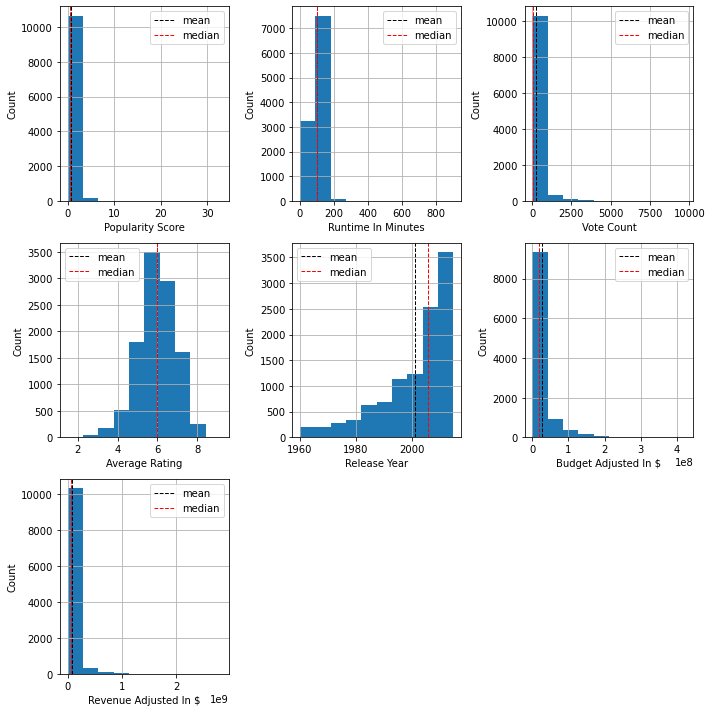

In [30]:
axs = df_v3_fill_0.hist(column=cols_numeric, figsize=(10,10))
plot_df_histogram(df_v3_fill_0, axs, cols_numeric, cols_x_label)

Based on the plotted histograms per feature, the popularity score is low for most movies. Just a few movies are really popular, which leads to a right-skwed distribution. Two thirds of the movies have a runtime of roughly 100-180 minutes. The runtime data is left-skewed. For most movies there exists just a small vote count compared to the maximum values. It's a right-skewed distribution for vote count. It's visible that most movies tend to have an average rating (normal distribution, maybe just a little bit right-skewed). The number of movie releases per year seems to increase. The count of releases per year is distributed left-skewed. The budget and revenue adjusted seem to be distributed right-skewed, but between 50% and 75% of the records there were 0 values have been filled by the respective means.

By dropping outliers and just selecting certain records of a feature by using where-clauses-queries it would be possible to  plot improved histrograms that lead to more precise deductions. Right now, this does not seem to be necessary for further anaylsis.

Correlation of numeric features of dataset `data/tmdb-movies_v3_filled_0_budget_revenue.csv` in scattermatrix follows.

In [31]:
# Helpfer function to plot a scatter matrix
def plot_scatter_matrix(df, columns, x_labels):
    # Get the scatter_matrix subplot axes
    axs = scatter_matrix(df[columns], alpha=0.2, figsize=(15,15))
    # Iterate through the subplot rows
    for r in range(axs.shape[0]):
        # Iterate through the subplot columns
        for c in range(axs[r].size):
            # For each first column per row, adjust the y_label
            if c == 0:
                # Horizontal text orientation
                axs[r][c].yaxis.label.set_rotation(0)
                # Horizontal alignment
                axs[r][c].yaxis.label.set_ha('right')
                # Set the y_label
                axs[r][c].set_ylabel(x_labels[r])
            if r+1 == axs.shape[0]:
                # 45 degree text orientation
                axs[r][c].xaxis.label.set_rotation(45)
                # Vertical alignment
                axs[r][c].xaxis.label.set_va('top')
                # Set the x_label
                axs[r][c].set_xlabel(x_labels[c])
    # Add some width and height spacing to have a distance between the plots in the subplot grid
    plt.gcf().subplots_adjust(wspace=0.1, hspace=0.1);

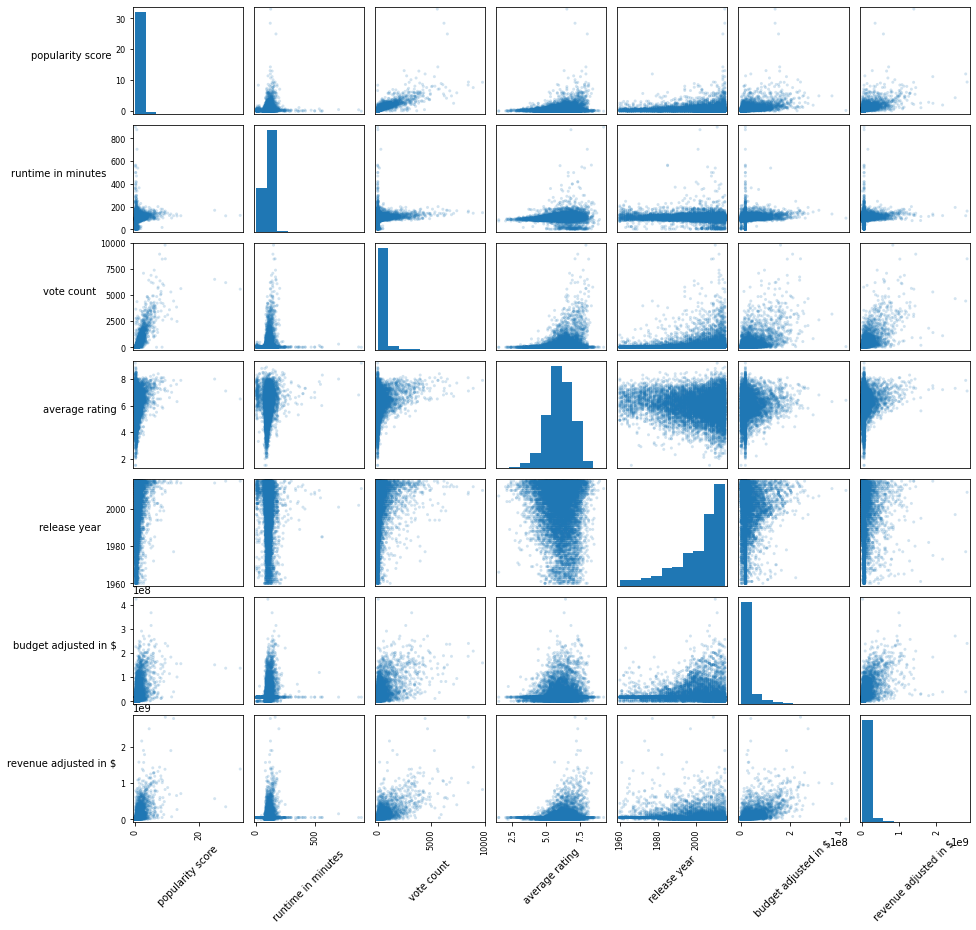

In [32]:
plot_scatter_matrix(df_v3_fill_0, cols_numeric, cols_x_label)

Based on the scatter plots, it seems to be that the following features have a positive correlation:
1. `vote _count` and `popularity`
1. `budget_adj` and `revenue_adj`
1. `vote _count` and `budget_adj`
1. `vote _count` and `revenue_adj`

Distribution of dataset `data/tmdb-movies_v2_dropped_0_budget_revenue.csv'` in histograms inclusive mean and median per numeric feature follows.

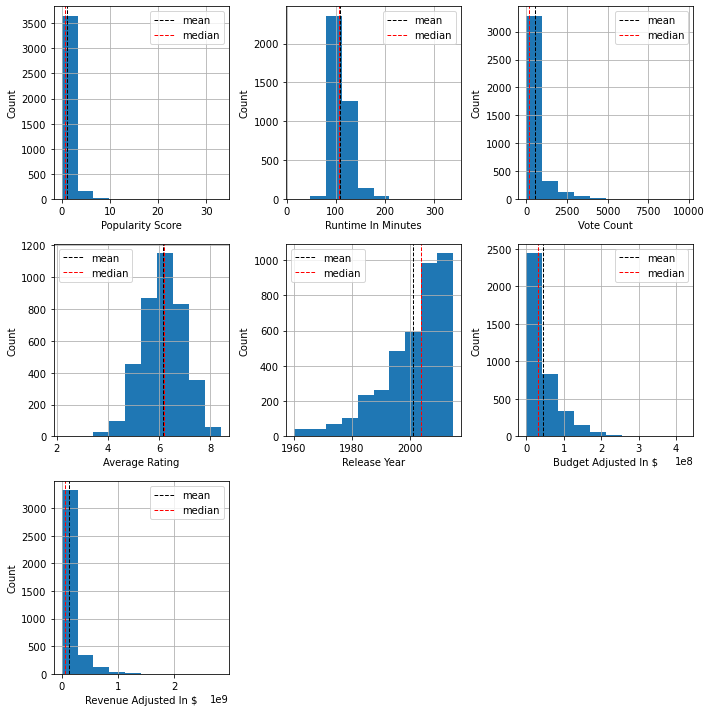

In [33]:
axs = df_v2_drop_0.hist(column=cols_numeric, figsize=(10,10))
plot_df_histogram(df_v2_drop_0, axs, cols_numeric, cols_x_label)

The `data/tmdb-movies_v2_dropped_0_budget_revenue.csv` data does not contain records with 0 values for budget and revenue adjusted. Still, the histograms for the numeric features look very similar to the histrograms of the features previously plotted for `data/tmdb-movies_v3_filled_0_budget_revenue.csv`. The observations made previously are confirmed.

Correlation of numeric features of dataset `data/tmdb-movies_v2_dropped_0_budget_revenue.csv` in scattermatrix follows.

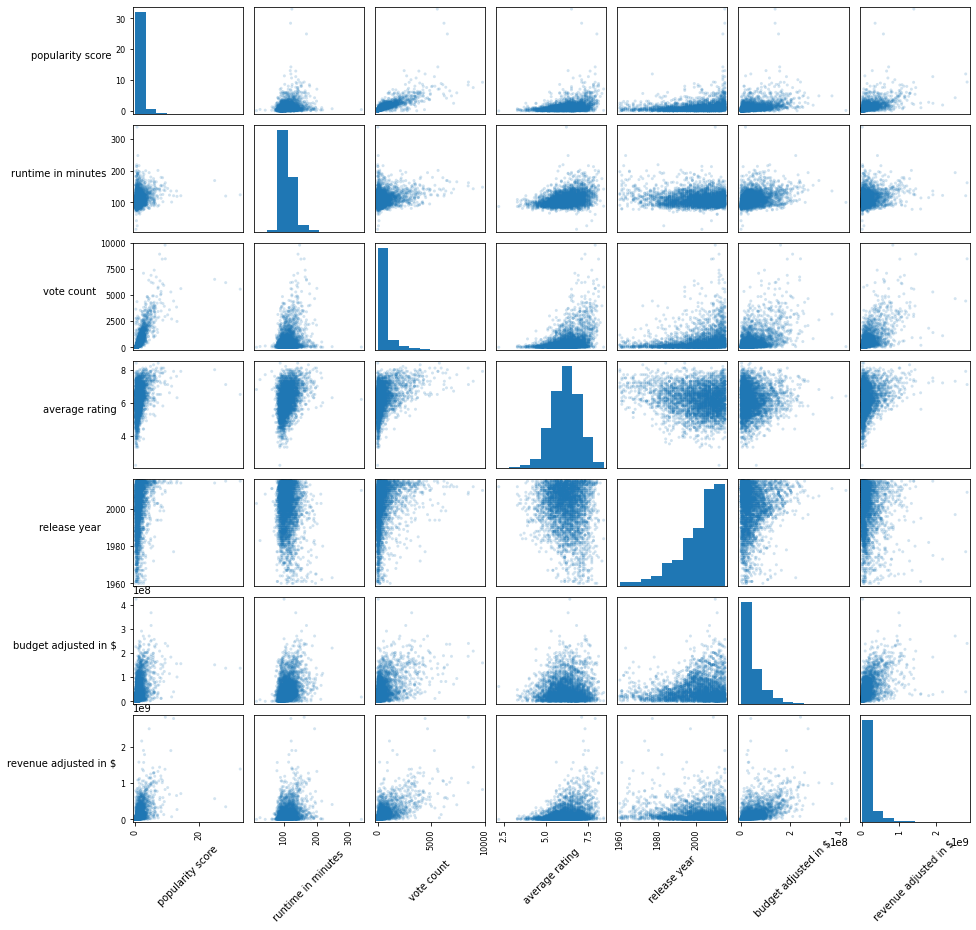

In [34]:
plot_scatter_matrix(df_v2_drop_0, cols_numeric, cols_x_label)

The scatter matrix for the numeric features of `data/tmdb-movies_v3_filled_0_budget_revenue.csv` looks very similar to the previously plotted matrix for `data/tmdb-movies_v2_dropped_0_budget_revenue.csv`, too. The observations made previously are confirmed.

### 1. What are the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?

In [35]:
# Define the count of top or worse records
top_count = 10

In [36]:
# Get df sorted by popularity using the dataset with dropped budget/revenue adj 0 values
top_count_revenue = df_v2_drop_0.sort_values(by='revenue_adj', ascending=False)
# Calculate the profit using the dataset with dropped budget/revenue adj 0 values
top_count_profit = df_v2_drop_0.copy()
top_count_profit['profit'] = top_count_profit.eval('revenue_adj - budget_adj')
# Get df sorted by profit 
top_count_profit = top_count_profit.sort_values(by='profit', ascending=False)
# # Get df sorted by rating using the dataset containing filled budget/revenue adj values
top_count_rating = df_v3_fill_0.sort_values(by='vote_average', ascending=False)
# Get df sorted by popularity using the dataset containing filled budget/revenue adj values
top_count_popularity = df_v3_fill_0.sort_values(by='popularity', ascending=False)

In [37]:
# Helper function to plot a horizontal bar plot
def barplot(data, x, y, category, category_count, xlabel, ylabel):
    sns.barplot(data=data, x=x, y=y)
    plt.title('{} {} Movies by {}'.format(category, category_count, xlabel))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

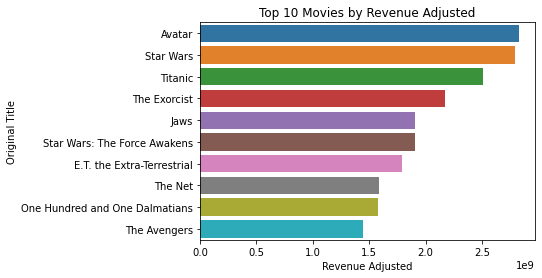

In [38]:
# Call the function to create the plot for answering the question
barplot(top_count_revenue[:top_count], 'revenue_adj', 'original_title', 'Top', top_count, 'Revenue Adjusted', 'Original Title')

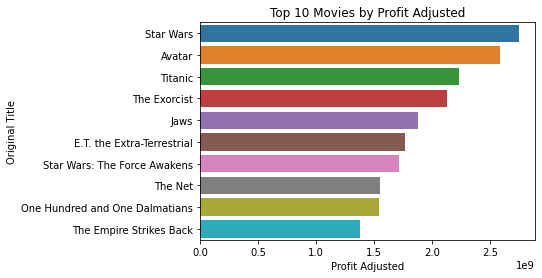

In [39]:
# Call the function to create the plot for answering the question
barplot(top_count_profit[:top_count], 'profit', 'original_title', 'Top', top_count, 'Profit Adjusted', 'Original Title')

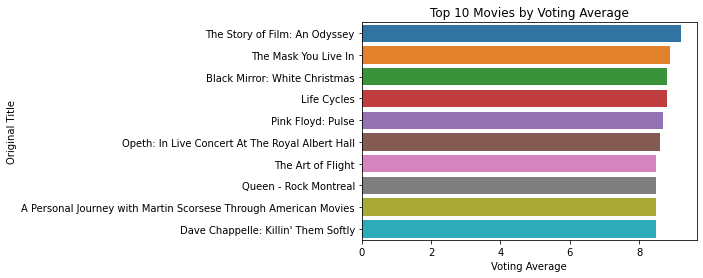

In [40]:
# Call the function to create the plot for answering the question
barplot(top_count_rating[:top_count], 'vote_average', 'original_title', 'Top', top_count, 'Voting Average', 'Original Title')

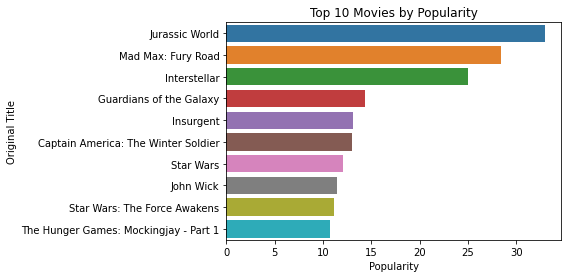

In [41]:
# Call the function to create the plot for answering the question
barplot(top_count_popularity[:top_count], 'popularity', 'original_title', 'Top', top_count, 'Popularity', 'Original Title')

### 2. Are there any movies which are represented in more than one top 10 movies category previously explored?

Those movies are the **top movies**.

In [42]:
# Helper function
def get_movies_represented_often(movies, category, category_count):
    # Initialize empty lists
    keys, values = [], []
    # For each dictionary item extract the key and value, 
    # if the value (count) is larger than 1 and store in respective lists
    for k, v in movies.items():
        if v > 1:
            keys.append(k)
            values.append(v)
    # If the values list is not empty, sort the keys and values, by values descending to plot highest key/value pairs on top
    if len(values):
        # Create iterateable zip object contain tuples of values, key pairs
        zipped_tuples = zip(values, keys)
        # Sort the zip objects by value descending
        sorted_tuple_list = sorted(zipped_tuples, reverse=True)
        # Initialize empty lists again
        keys, values = [], []
        # Add the sorted items back to the respective lists
        for item in sorted_tuple_list:
            values.append(item[0])
            keys.append(item[1])
        # Create a horizontal bar plot
        sns.barplot(x=values, y=keys)
        plt.title('Movies represented in more than one {} {} Movies category'.format(category, category_count))
        plt.xlabel('Count in {} {}'.format(category, top_count))
        plt.ylabel('Original Title');
    # None of the movies has a larger count than 1
    else:
        print("No plot will be generated. None of the {} {} movies is represented in more than one category.".format(category, category_count))


In [43]:
# Create an empty dictionary
top_movies = {}
# Create an ndarry contains all the top movies per category lists previously explored
top_movies_list = np.array([top_count_revenue['original_title'][:top_count].values,
                   top_count_profit['original_title'][:top_count].values,
                   top_count_rating['original_title'][:top_count].values,
                   top_count_popularity['original_title'][:top_count].values])
# For each list within ndarray
for l in top_movies_list:
    # For each movie in a list
    for m in l:
        # If the movie is in the dictionary as key, return the count as value
        # If the movie is not in the dictionary as key, return 0 as count
        count = top_movies.get(m, 0)
        # Add/update the value of the movie in dictionary by increasing the count by 1
        top_movies[m] = count + 1

In [44]:
# Flatten the 2D ndarray to a 1D ndarray and remove duplicates by casting to set
top_movies_unique = set(top_movies_list.flatten())

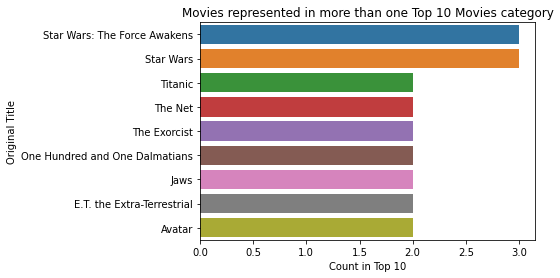

In [45]:
# Call the function to create the plot for answering the question
get_movies_represented_often(top_movies, 'Top', top_count)

### 3. What genres are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?

In [46]:
# Helper function to get count for specific columns of records that match movie titles
def get_counts(source_df, movie_titles, count_columns):
    # Select records where the title matches the provided titles
    df = source_df[source_df['original_title'].isin(movie_titles)]
    # Create an empty list
    drop_cols = []
    # Add all columns to the list that need to be dropped, because they are not in the list representing columns to be counted
    for c in df.columns:
        if c not in count_columns:
            drop_cols.append(c)
    # Drop the columns
    df = df.drop(drop_cols, axis=1)
    # Apply the value_counts top level function and return the output
    return df.apply(pd.value_counts)

In [47]:
# Create an empty ndarray
unique_genres = np.array([])
# Iterate through all columns
for c in df_v2_drop_0.columns:
    if c.startswith('genre'):
        # Get a list of unique values per genre column and concatenate it to a ndarray
        unique_genres = np.concatenate((unique_genres, df_v2_drop_0[c].unique()))
# Cast the ndarray to a set in order to drop duplicates
unique_genres = set(unique_genres)
# Remove None values
unique_genres.remove(None)
print('List of all {} genres: {}'.format(len(unique_genres),sorted(unique_genres)))

List of all 20 genres: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [48]:
# Apply the value_counts top level function to the df
genres_top_counts = get_counts(df_v2_drop_0, top_movies_unique, genre_cols)
# Fill all NaN values with 0
genres_top_counts.fillna(0, inplace=True)
# Accumulate the total count per genre
genres_top_counts['total'] = 0
for c in genre_cols:
    genres_top_counts['total'] += genres_top_counts[c]
# Sort the df descending by total
genres_top_counts.sort_values(by='total', inplace=True, ascending=False)

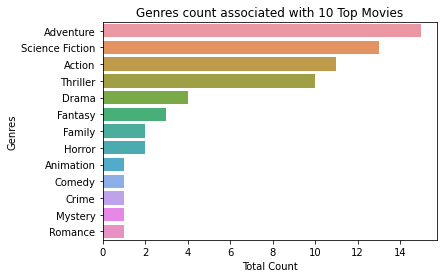

In [49]:
sns.barplot(x=genres_top_counts.total, y=genres_top_counts.index);
plt.xlabel('Total Count')
plt.ylabel('Genres')
plt.title('Genres count associated with {} {} Movies'.format(top_count, 'Top'));

### 4. What directors are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?

In [50]:
# Apply the value_counts top level function to the df
director_top_counts = get_counts(df_v2_drop_0, top_movies_unique, director_cols)
# Fill all NaN values with 0
director_top_counts.fillna(0, inplace=True)
# Accumulate the total count per director
director_top_counts['total'] = 0
for c in director_cols:
    director_top_counts['total'] += director_top_counts[c]
# Sort the df descending by total
director_top_counts.sort_values(by='total', inplace=True, ascending=False)

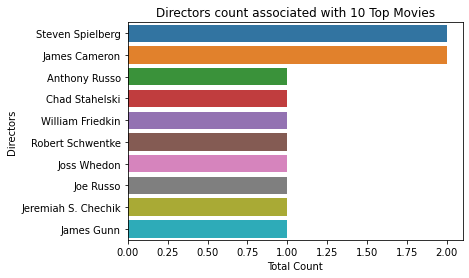

In [51]:
sns.barplot(x=director_top_counts.total[:10], y=director_top_counts.index[:10]);
plt.xlabel('Total Count')
plt.ylabel('Directors')
plt.title('Directors count associated with {} {} Movies'.format(top_count, 'Top'));

### 5. What casts are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?

In [52]:
# Apply the value_counts top level function to the df
cast_top_counts = get_counts(df_v2_drop_0, top_movies_unique, cast_cols)
# Fill all NaN values with 0
cast_top_counts.fillna(0, inplace=True)
# Accumulate the total count per cast
cast_top_counts['total'] = 0
for c in cast_cols:
    cast_top_counts['total'] += cast_top_counts[c]
# Sort the df descending by total
cast_top_counts.sort_values(by='total', inplace=True, ascending=False)

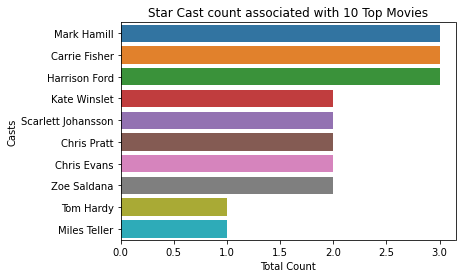

In [53]:
sns.barplot(x=cast_top_counts.total[:10], y=cast_top_counts.index[:10]);
plt.xlabel('Total Count')
plt.ylabel('Casts')
plt.title('Star Cast count associated with {} {} Movies'.format(top_count, 'Top'));

### 6. What production companies are associated with the top 10 movies with highest revenue adjusted, profit adjusted, voting average and popularity?

In [54]:
# Apply the value_counts top level function to the df
prod_comps_top_counts = get_counts(df_v2_drop_0, top_movies_unique, prod_comps_cols)
# Fill all NaN values with 0
prod_comps_top_counts.fillna(0, inplace=True)
# Accumulate the total count per cast
prod_comps_top_counts['total'] = 0
for c in prod_comps_cols:
    prod_comps_top_counts['total'] += prod_comps_top_counts[c]
# Sort the df descending by total
prod_comps_top_counts.sort_values(by='total', inplace=True, ascending=False)

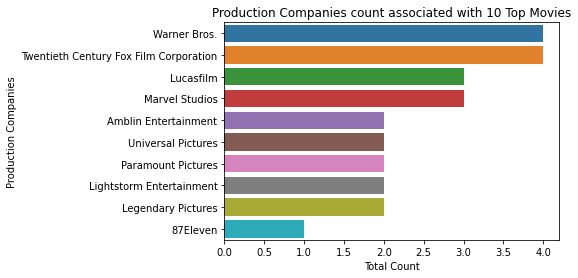

In [55]:
sns.barplot(x=prod_comps_top_counts.total[:10], y=prod_comps_top_counts.index[:10]);
plt.xlabel('Total Count')
plt.ylabel('Production Companies')
plt.title('Production Companies count associated with {} {} Movies'.format(top_count, 'Top'));

### 7. What are the worst 10 movies with lowest revenue adjusted, profit adjusted, voting average and popularity?

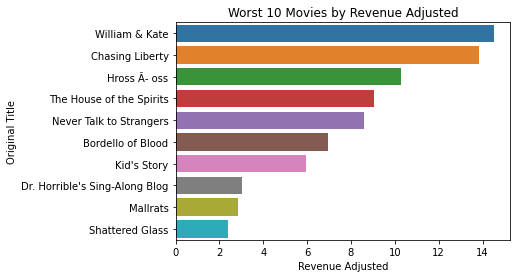

In [56]:
# Call the function to create the plot for answering the question
barplot(top_count_revenue[-top_count:], 'revenue_adj', 'original_title', 'Worst', top_count, 'Revenue Adjusted', 'Original Title')

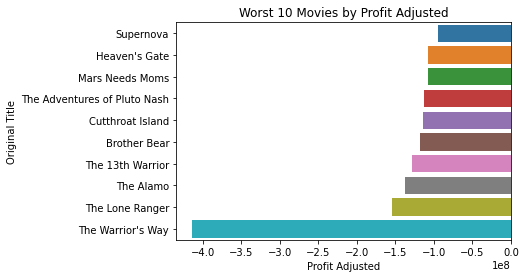

In [57]:
# Call the function to create the plot for answering the question
barplot(top_count_profit[-top_count:], 'profit', 'original_title', 'Worst', top_count, 'Profit Adjusted', 'Original Title')

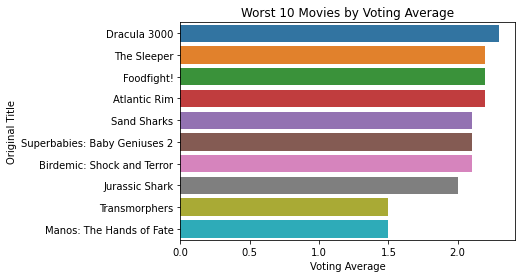

In [58]:
# Call the function to create the plot for answering the question
barplot(top_count_rating[-top_count:], 'vote_average', 'original_title', 'Worst', top_count, 'Voting Average', 'Original Title')

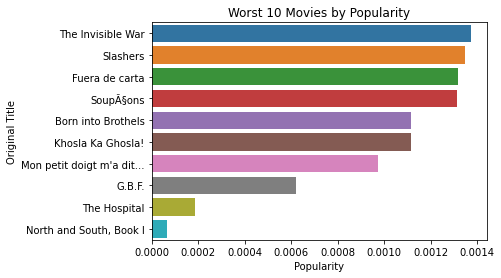

In [59]:
# Call the function to create the plot for answering the question
barplot(top_count_popularity[-top_count:], 'popularity', 'original_title', 'Worst', top_count, 'Popularity', 'Original Title')

### 8. Are there any movies which are represented in more than one worst 10 movies category previously explored?
Those movies are the **worst movies**.

In [60]:
# Create an empty dictionary
worst_movies = {}
# Create an ndarry contains all the top movies per category lists previously explored
worst_movies_list = np.array([top_count_revenue['original_title'][-top_count:].values,
                   top_count_profit['original_title'][-top_count:].values,
                   top_count_rating['original_title'][-top_count:].values,
                   top_count_popularity['original_title'][-top_count:].values])
# For each list within ndarray
for l in worst_movies_list:
    # For each movie in a list
    for m in l:
        # If the movie is in the dictionary as key, return the count as value
        # If the movie is not in the dictionary as key, return 0 as count
        count = worst_movies.get(m, 0)
        # Add/update the value of the movie in dictionary by increasing the count by 1
        worst_movies[m] = count + 1

In [63]:
# Flatten the 2D ndarray to a 1D ndarray and remove duplicates by casting to set
worst_movies_unique = set(worst_movies_list.flatten())

In [64]:
# Call the function to create the plot for answering the question
get_movies_represented_often(worst_movies, 'Worst', top_count)

No plot will be generated. None of the Worst 10 movies is represented in more than one category.


### 9. What genres are associated with the worst 10 movies with lowest revenue adjusted, profit adjusted, voting average and popularity?

In [65]:
# Apply the value_counts top level function to the df
worst_genres_counts = get_counts(df_v2_drop_0, worst_movies_unique, genre_cols)
# Fill all NaN values with 0
worst_genres_counts.fillna(0, inplace=True)
# Accumulate the total count per genre
worst_genres_counts['total'] = 0
for c in genre_cols:
    worst_genres_counts['total'] += worst_genres_counts[c]
# Sort the df descending by total
worst_genres_counts.sort_values(by='total', inplace=True, ascending=False)

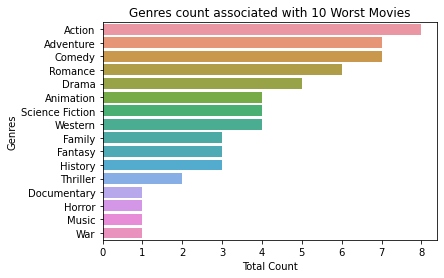

In [66]:
sns.barplot(x=worst_genres_counts.total, y=worst_genres_counts.index);
plt.xlabel('Total Count')
plt.ylabel('Genres')
plt.title('Genres count associated with {} {} Movies'.format(top_count, 'Worst'));

### 10. How many movies per genre have been released?

In [69]:
# Create a new df for counting movie genres
movie_genres = df_v3_fill_0.copy()
# Create an empty list
drop_cols = []
# Add all columns to the list that need to be dropped, because they are not in the list representing columns to be counted
for c in movie_genres.columns:
    if c not in genre_cols:
        drop_cols.append(c)
# Drop the columns
movie_genres = movie_genres.drop(drop_cols, axis=1)
# Apply the value_counts top level function to the df
movie_genres = movie_genres.apply(pd.value_counts)
# Fill all NaN values with 0
movie_genres.fillna(0, inplace=True)
# Accumulate the total count per genre
movie_genres['total'] = movie_genres.genre_0 + movie_genres.genre_1 + movie_genres.genre_2 + movie_genres.genre_3 + movie_genres.genre_4
# Sort the df descending by total
movie_genres.sort_values(by='total', inplace=True, ascending=False)
movie_genres

,genre_0,genre_1,genre_2,genre_3,genre_4,total
Drama,2453,1618,546,124,19.0,4760.0
Comedy,2319,990,388,81,15.0,3793.0
Thriller,491,961,886,449,120.0,2907.0
Action,1590,544,198,42,10.0,2384.0
Romance,186,704,583,194,45.0,1712.0
Horror,915,489,186,36,11.0,1637.0
Adventure,586,626,183,62,14.0,1471.0
Crime,380,449,350,152,23.0,1354.0
Family,144,448,401,178,60.0,1231.0
Science Fiction,214,330,401,216,68.0,1229.0


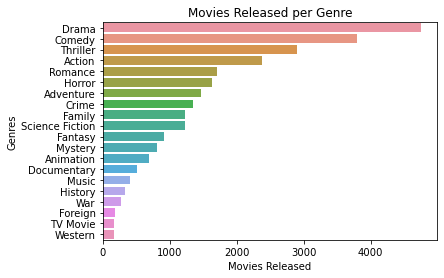

In [70]:
# Create a horizontal bar plot visualizing the results to answer the question
sns.barplot(x=movie_genres.total, y=movie_genres.index);
plt.xlabel('Movies Released')
plt.ylabel('Genres')
plt.title('Movies Released per Genre'.format(top_count, 'Top'));

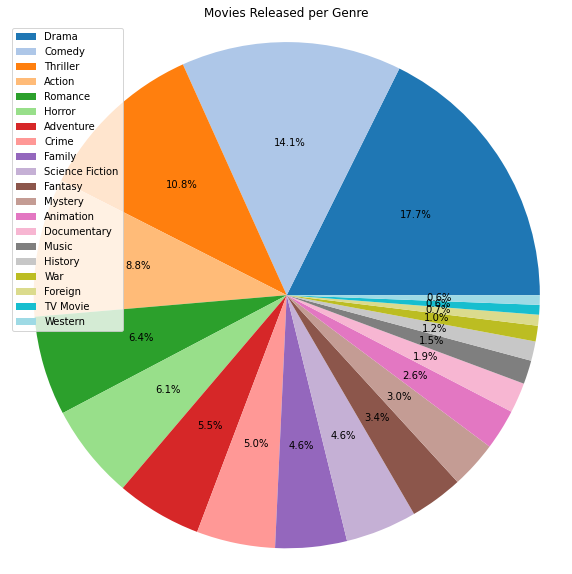

In [71]:
# Use tab20 color map, which provides 20 colors for quantitative visualizations
# Get the color map
cm_tab20 = cm.get_cmap('tab20', 20)
# Define colors for 3 channels
colors = cm_tab20(np.linspace(0, 1, 20))
# Generate the subplot area
fig, ax = plt.subplots(1, figsize=(10,10))
# Create a pie plot visualizing the results to answer the question
ax.pie(x=movie_genres.total, labels=movie_genres.index, autopct='%1.1f%%', startangle=0, labeldistance=None, colors=colors)
ax.axis('equal')
ax.legend(loc='best')
ax.set_title('Movies Released per Genre');

### 11. How many movies have been released per year? 

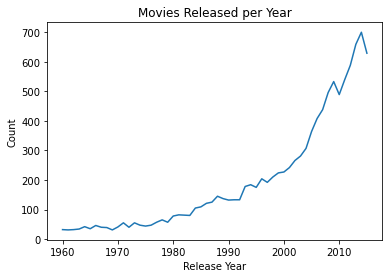

In [72]:
# Groupy the data by release_year using the dataset containing filled budget/revenue adj values,
# because of the higher number of records and count the number of non NaN value in 'id' column
count_per_year = df_v3_fill_0.groupby(by='release_year').count()['id']
# Create a line plot visualizing the results to answer the question
sns.lineplot(data=count_per_year, x=count_per_year.index, y=count_per_year)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies Released per Year');

In [73]:
print("Year with minimum count of released movies: {} - {} movies".format(count_per_year.idxmin(), count_per_year.min()))
print("Year with maximum count of released movies: {} - {} movies".format(count_per_year.idxmax(), count_per_year.max()))
print("Change: {} times multiple in {} years".format(round(count_per_year.max()/count_per_year.min()), 
                                                        count_per_year.idxmax() - count_per_year.idxmin()))

Year with minimum count of released movies: 1961 - 31 movies
Year with maximum count of released movies: 2014 - 700 movies
Change: 23 times multiple in 53 years


### 12. Movies released in which month generated the highest revenues and profit?

In [74]:
# Create a copy of the dataset with dropped budget/revenue adj 0 values
month_revenue_profit = df_v2_drop_0.copy()
# Calculate the profit and add as new column
month_revenue_profit['profit'] = month_revenue_profit.eval('revenue_adj - budget_adj')
# Get the month as string out of release_date and add as new column
month_revenue_profit['month'] = month_revenue_profit['release_date'].dt.strftime('%b')
# Group the data by month
grouped_by_month = month_revenue_profit.groupby(by='month')

In [75]:
# Sum up the revenue_adj per month and sort it ascending
month_revenue = grouped_by_month['revenue_adj'].sum().sort_values()
month_revenue

month
Jan    1.607863e+10
Feb    2.141533e+10
Sep    2.912213e+10
Apr    2.964242e+10
Aug    3.005392e+10
Oct    3.675235e+10
Mar    3.698163e+10
Jul    5.521232e+10
Nov    5.613992e+10
May    5.957570e+10
Jun    7.835014e+10
Dec    7.892283e+10
Name: revenue_adj, dtype: float64

In [76]:
# Sum up the profit per month and sort it ascending
month_profit = grouped_by_month['profit'].sum().sort_values()
month_profit

month
Jan    1.028501e+10
Feb    1.228176e+10
Sep    1.650222e+10
Aug    1.817372e+10
Apr    1.892708e+10
Oct    2.325971e+10
Mar    2.505131e+10
Jul    3.843788e+10
Nov    3.917966e+10
May    4.239264e+10
Dec    5.658429e+10
Jun    5.667111e+10
Name: profit, dtype: float64

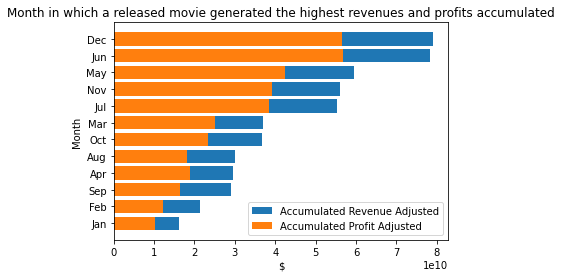

In [77]:
# Create one barplot for the accumulated revenue distribution per month
plt.barh(width=month_revenue, y=month_revenue.index, label='Accumulated Revenue Adjusted');
# Create a second barplot for the accumulated profit distribution per month on the same axis
plt.barh(width=month_profit, y=month_profit.index, label='Accumulated Profit Adjusted');
# Show a legend
plt.legend(loc='best')
# Set the x_label and y_label and title
plt.xlabel('$')
plt.ylabel('Month')
plt.title('Month in which a released movie generated the highest revenues and profits accumulated');

<a id='conclusions'></a>
## Conclusions

The **Top and Worst Movies within the categories `Revenue Adjusted`, `Profit Adjusted`, `Voting Average` and `Popularity`** were determined. The highest values led to the top movies and lowest values to worst movies. Based on counting the movies represented in more than one top or worst movie category, the **Overall Top and Worst Movies** were tried to be identified. To explore the **Top and Worst Movie Genres**, the genres associated with the top and worst movies per category were taken into consideration. The same approach was used to explore the **Top Movie Directors**, **Top Movie Star Cast** and **Top Movie Production Companies** associated with the top movies per category. Independently of the top and worst movies per category, the **total number of movies released per genre** has been determined. Based on the movie release dates, it was revealed **how many movies were released per year** and **in which month movies releases generated the highest revenues and profits accumulated**. The results are summarized below. The detailed charts are provided in <a href="#eda">Exploratory Data Analysis</a> section for each research question.

**9 Overall Top Movies:**
* With a presence of *three times* in the top movie categories, the overall top movies are **Star Wars: The Force Awakens** and **Star Wars**. 
* With a presence of *two times* in the top movie categories, the overall top movies are **Titanic**, **The Net**, **The Exorcist**, **One Hundred and One Dalmatians**, **Jaws**, **E.T. the Extra Terrestrial** and **Avatar**.

An **Overall Worst Movie** does not exists based on the approach. The Worst Movie per Category is:

* `Revenue Adjusted`: **Shattered Glas** 
* `Profit Adjusted`: **The Warrior's Way**
* `Voting Average`: **Manos: The Hands of Fate**
* `Popularity`: **North and South, Book I**

The **Top 5 Movie Genres** are **Adventure**, **Science Fiction**, **Action**, **Thriller** and **Drama**.

The **Worst 5 Movie Genres** are **Action**, **Adventure**, **Comedy**, **Romance** and **Drama**.

Genres are not solely decisive for the determination of a top or worst movie, because 3 genres within the top an worst 5 genres are associated with the top and the worst movies. 

The **Top 5 Genres** for which the most movies have been releases are **Drama**, **Comedy**, **Thriller**, **Action** and **Romance**.

**Top Directors in more than one Top Movie**
* With a presence of *two times* in the top movie categories, the overall top directors are **Steven Spielberg** and **James Cameron**.
* All other directors of Top Movies are not represented in more than one top movie per category.

**Top Star Cast in more than one Top Movie**
* With a presence of *three times* in the top movie categories, the overall top star casts are **Mark Hamill**, **Carrie Fisher** and **Harrison Ford**.
* With a presence of *two times* in the top movie categories, the overall top star casts are **Kate Winslet**, **Scarlett Johansson**, **Chris Pratt**, **Chris Evans** and **Zoe Saldana**.

**Top Production Companies in more than one Top Movie**
* With a presence of *four times* in the top movie categories, the overall top production companies are **Warner Bros.** and **Twentieth Century Fox Film Corporation**.
* With a presence of *three times* in the top movie categories, the overall top production companies are **Lucasfilm** and **Marvel Studios**.
* With a presence of *two times* in the top movie categories, the overall top production companies are **Amblin Entertainment**, **Universal Pictures**, **Paramount Pictures**, **Lightstorm Entertainment** and **Legendary Pictures**.

The number of movies released per year is growing. In 1961 just 31 movies were released. Compared to that 700 movies were released in 2014. This is roughly **23 times more released movies per year compared to 53 years ago**.

The **best months for releasing a movie are by far December and June**. In both month similar high profits and revenues accumulated were created. May, November and July are following.

### Limitations

* The dataset does not contain movies released after 2015.
* Between 50% and less than 75% of the numeric values for the columns `budget`, `revenue`, `budget_adj` and `revenue_adj` were 0. Those records were not considered in any analysis involving those features, see `data/tmdb-movies_v2_dropped_0_budget_revenue.csv`.
* No text analysis, prediction and statistical tests that would strengthen results were done.
* The columns `'overview', 'tagline', 'homepage', 'keywords', 'revenue', 'budget'` were dropped and not considered in the analysis.
* The `genres`, `cast`, `director` and `production_companies` columns have been split by `|` character and expanded to new columns.